# Example 4: Simulated site profile

Generate simulated shear-wave velocity profiles.

In [ ]:
import matplotlib.pyplot as plt

import pystrata

%matplotlib inline

In [ ]:
# Increased figure sizes
plt.rcParams["figure.dpi"] = 120

Create a simple site profile

In [ ]:
profile = pystrata.site.Profile(
    [
        pystrata.site.Layer(
            pystrata.site.SoilType("Soil-1", 18.0, None, 0.05), 30, 400
        ),
        pystrata.site.Layer(
            pystrata.site.SoilType("Soil-2", 19.0, None, 0.05), 20, 600
        ),
        pystrata.site.Layer(pystrata.site.SoilType("Rock", 24.0, None, 0.01), 0, 1200),
    ]
)

Initialize the variations.

In [ ]:
toro_thickness = pystrata.variation.ToroThicknessVariation()
toro_velocity = pystrata.variation.ToroVelocityVariation.generic_model("USGS B")

Create the varied thickness and velocity.

In [ ]:
%pdb

Automatic pdb calling has been turned ON


In [ ]:
count = 10
# Create realizations of the profile with varied thickness
varied_thick = [toro_thickness(profile) for _ in range(count)]

# For eaach realization of varied thickness, vary the shear-wave velocity
varied_vel = [toro_velocity(rt) for rt in varied_thick]

Create a plot of the varied velocity models.

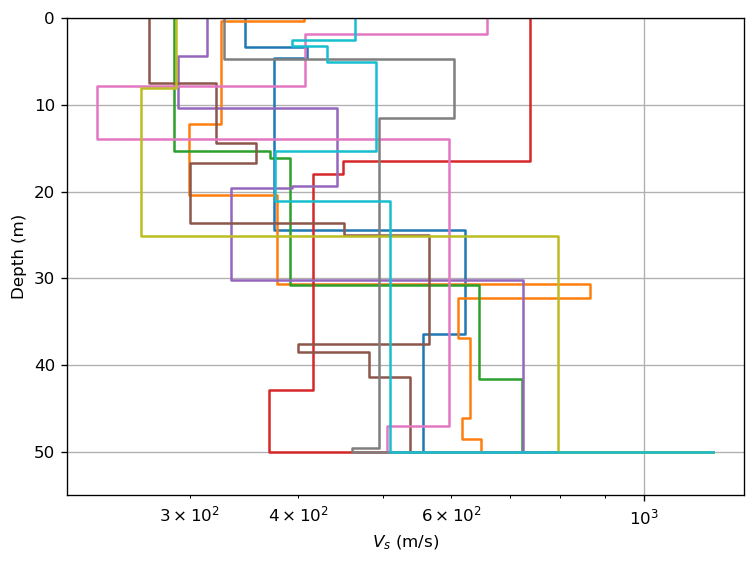

In [ ]:
fig, ax = plt.subplots()

for profile in varied_vel:
    ax.plot(
        [layer.initial_shear_vel for layer in profile],
        [layer.depth for layer in profile],
        drawstyle="steps-pre",
    )

ax.set(xlabel="$V_s$ (m/s)", xscale="log", ylabel="Depth (m)", ylim=(55, 0))

ax.grid()
fig.tight_layout();